In [1]:
import numpy as np
import matplotlib.pyplot as plt

def discretize(arr):
    return [1 if num >= 0.5 else 0 for num in arr]

def to_bin(arr):
    return ''.join(list(map(str,arr)))

def f(x,r):
    return r * x * (1-x)

def logistic_map(x_0,r,iterations,epsilon=0,e_freq=0):
    res = [x_0]
    cur = x_0
    kicks = np.random.rand(iterations) < e_freq
    epsilons = np.random.uniform(-epsilon,epsilon,size=iterations)
    for i,is_kick in enumerate(kicks):
        cur = r * cur * (1-cur)

        # When kick occurs
        if is_kick:
            added_eps = epsilons[i]
            # Keep sampling for epsilon until we get a valid value
            while  0>= cur + added_eps or cur + added_eps>=1:
                added_eps = np.random.uniform(-epsilon,epsilon)
            cur += added_eps
        assert 0<= cur <=1, f"Cur os {cur}"
        res.append(cur)
    return res

0.7477900820345867 2.804572315275718


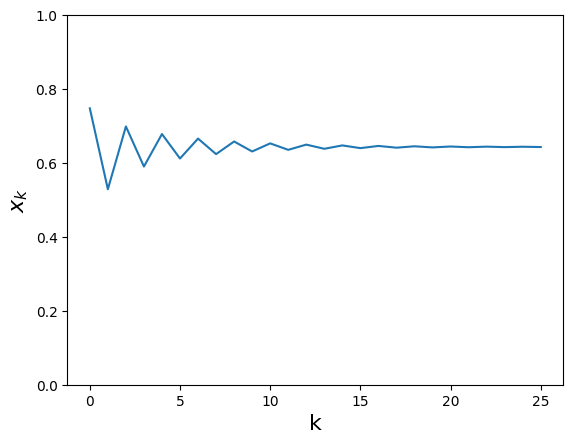

In [7]:
import random

x_0 = np.random.rand()
r = random.uniform(0,4)
r ,x_0 =2.804572315275718, 0.7477900820345867
print(x_0,r)
iters = 25
y = logistic_map(x_0,r,iters,0,0)
plt.plot(list(range(iters+1)),y)
plt.ylim(ymin=0,ymax=1)
plt.xlabel("k",fontsize=16)
plt.ylabel(r"$x_k$",fontsize=16)
plt.savefig("results/logistic_map_trajectory/no_kicks.jpg")

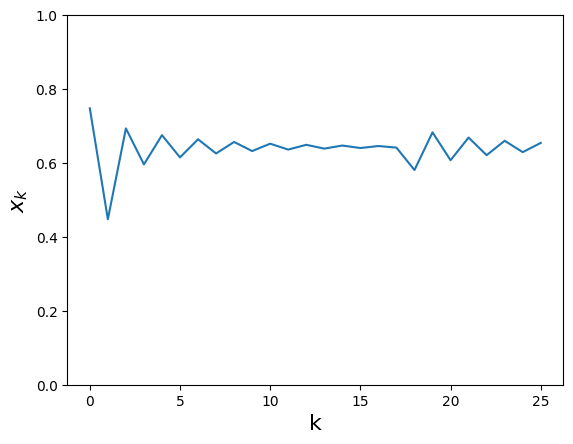

In [8]:
# small kick small freq
y2 = logistic_map(x_0,r,iters,0.1,0.1)
plt.plot(list(range(iters+1)),y2)
plt.ylim(ymin=0,ymax=1)
plt.xlabel("k",fontsize=16)
plt.ylabel(r"$x_k$",fontsize=16)
plt.savefig("results/logistic_map_trajectory/small_kick_small_freq.jpg")

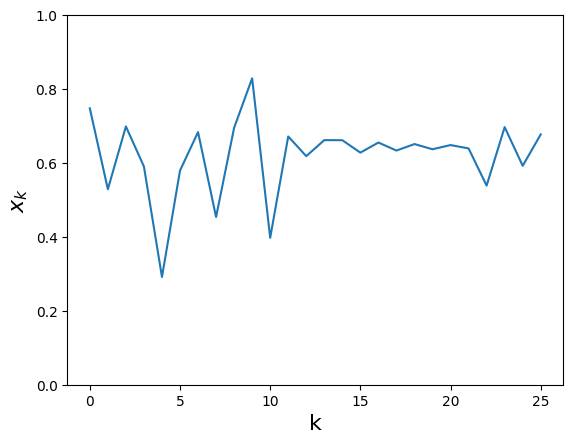

In [33]:
# Big? kick low freq
y3 = logistic_map(x_0,r,iters,0.5,0.1)
plt.plot(list(range(iters+1)),y3)
plt.ylim(ymin=0,ymax=1)
plt.xlabel("k",fontsize=16)
plt.ylabel(r"$x_k$",fontsize=16)
plt.savefig("results/logistic_map_trajectory/big_kick_low_freq.jpg")

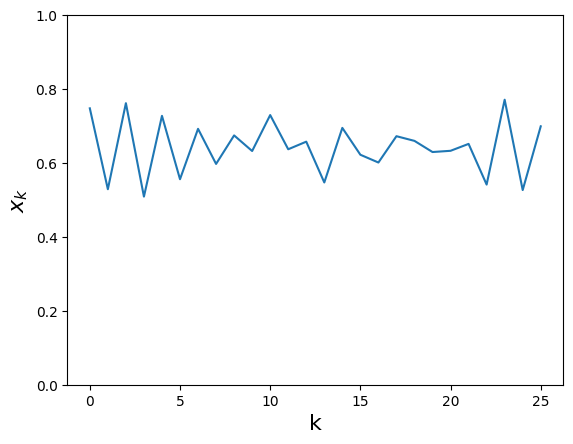

In [85]:
# small kick, high freq
y4 = logistic_map(x_0,r,iters,0.1,0.5)
plt.plot(list(range(iters+1)),y4)
plt.ylim(ymin=0,ymax=1)
plt.xlabel("k",fontsize=16)
plt.ylabel(r"$x_k$",fontsize=16)
plt.savefig("results/logistic_map_trajectory/small_kick_high_freq.jpg")

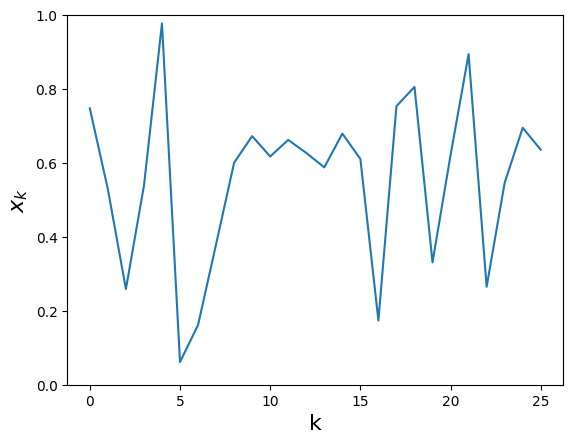

In [124]:
y5 = logistic_map(x_0,r,iters,0.5,0.5)
plt.plot(list(range(iters+1)),y5)
plt.ylim(ymin=0,ymax=1)
plt.xlabel("k",fontsize=16)
plt.ylabel(r"$x_k$",fontsize=16)
plt.savefig("results/logistic_map_trajectory/big_kick_high_freq.jpg")

Text(0, 0.5, '$x_n$')

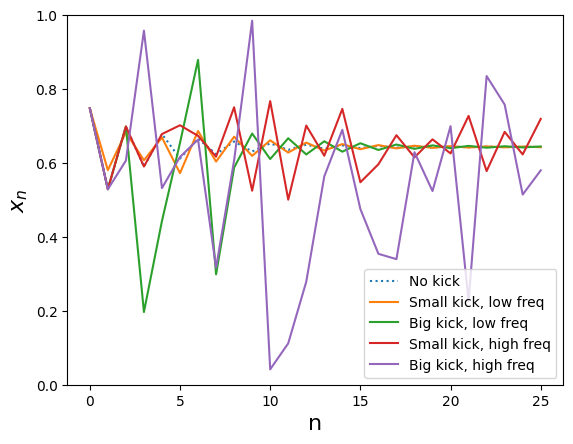

In [24]:
# combined
x = list(range(iters+1))
y = logistic_map(x_0,r,iters,0,0)
y2 = logistic_map(x_0,r,iters,0.1,0.1)
y3 = logistic_map(x_0,r,iters,0.5,0.1)
y4 = logistic_map(x_0,r,iters,0.1,0.5)
y5 = logistic_map(x_0,r,iters,0.5,0.5)
plt.plot(list(range(iters+1)),y,':',label='No kick')
plt.plot(list(range(iters+1)),y2,label='Small kick, low freq')
plt.plot(list(range(iters+1)),y3,label='Big kick, low freq')
plt.plot(list(range(iters+1)),y4,label='Small kick, high freq')
plt.plot(list(range(iters+1)),y5,label='Big kick, high freq')
plt.legend()
plt.ylim(ymin=0,ymax=1)
plt.xlabel("n",fontsize=16)
plt.ylabel(r"$x_n$",fontsize=16)